# Descriptions and genre

prepare the data:

In [264]:
import pandas as pd

youtube = pd.read_csv('youtube-data.csv')

# remove the white space in column names of youtube
youtube.columns = youtube.columns.str.strip()
print(youtube.columns)

# remove the white space from youtube['description']
youtube['description'] = youtube['description'].str.strip()

# for every column in youtube, remove the white space from the values if the value is a string
for column in youtube.columns:
    if youtube[column].dtype == 'object':
        youtube[column] = youtube[column].str.strip()

youtube

Index(['id', 'genre', 'publishedAt', 'title', 'description', 'channelTitle',
       'tags', 'categoryId', 'defaultAudioLanguage', 'duration', 'definition',
       'caption', 'licensedContent', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'hasPaidProductPlacement', 'topicCategories',
       'defaultLanguage', 'regionRestriction'],
      dtype='object')


,id,genre,publishedAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,...,caption,licensedContent,viewCount,likeCount,favoriteCount,commentCount,hasPaidProductPlacement,topicCategories,defaultLanguage,regionRestriction
0,ILCOJXYW_c4,Slam Poetry,2017-08-10T21:00:03Z,Anna Marie - Lessons in the Mirror,Become a member! Support Button Poetry: http:/...,Button Poetry,"['Slam Poetry', 'Button Poetry', 'poetry slam'...",24,en,PT2M49S,...,false,True,89043,3476,0,50,False,['https://en.wikipedia.org/wiki/Music'],,NaN
1,L3snfamyQ6M,Slam Poetry,2017-08-06T19:00:00Z,Jared Singer - Just Take a Shower,Get Jared's book here: http://bit.ly/jaredforg...,Button Poetry,"['Slam Poetry', 'Button Poetry', 'poetry slam'...",24,en,PT4M13S,...,true,True,792191,36084,0,475,False,['https://en.wikipedia.org/wiki/Music'],,NaN
2,4HhlV4aa8tM,Slam Poetry,2016-04-18T16:00:00Z,The Real Period Poem :: Queen Sheba,"Born in Detroit\, MI\, now living in Atlanta G...",Da Poetry Lounge,"['Slam Poetry', 'Slam Poem', 'Slam Poet', 'Poe...",24,,PT7M58S,...,false,False,121031,5200,0,74,False,['https://en.wikipedia.org/wiki/Music'],,NaN
3,Ckc21Cdblsc,Slam Poetry,2016-05-24T22:55:08Z,Reagan Myers - The Girl Becomes Gasoline,"Get Reagan's book\, AFTERWARDS: http://bit.ly/...",Button Poetry,"['Slam Poetry', 'Button Poetry', 'poetry slam'...",24,en,PT3M28S,...,true,True,1438810,50848,0,279,False,['https://en.wikipedia.org/wiki/Entertainment'],,NaN
4,Lv0VC92oxFQ,Slam Poetry,2016-08-04T20:42:51Z,"LionHeart - ""Pretty Hurts"" | All Def Poetry x ...",→ CONNECT WITH LIONHEART ← https://twitter.com...,All Def Poetry,"['Def Poetry', 'Def Poetry Jam', 'Russell Simm...",24,en-US,PT3M46S,...,false,True,408794,21158,0,253,False,['https://en.wikipedia.org/wiki/Music'],,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,nVBalxt3NEU,Ancient Memes,2008-07-09T04:40:13Z,NEDM Song,,seanthamaster,"['cat', 'coburn', 'this', 'program', 'pie', 'l...",10,,PT5M20S,...,false,False,665661,4632,0,1649,False,['https://en.wikipedia.org/wiki/Electronic_mus...,,NaN
922,T2e1tsnKkiI,Ancient Memes,2012-06-06T15:36:50Z,Beethoven Virus DDR Level Asian,Asian kid dancing to DDR Beethoven Virus. Amaz...,fundistraction,"['ddr', 'Revolution', 'Game', 'asian', 'korea'...",24,,PT1M49S,...,false,False,7372966,124584,0,9230,False,['https://en.wikipedia.org/wiki/Music'],,NaN
923,yU5KXTDCf-0,Ancient Memes,2008-01-02T19:05:15Z,GTA San Andreas Bigfoot + UFO,Get this song for FREE from audioswap: http://...,ScapeTheGoat,"['GTA', 'Grand', 'Theft', 'Auto', 'San', 'Andr...",24,,PT3M51S,...,false,False,4926282,41338,0,6265,False,['https://en.wikipedia.org/wiki/Action-adventu...,,NaN
924,CXerF6crDRs,Ancient Memes,2010-08-08T19:35:56Z,Pizza Kids - We Like Pizza (original version),i couldnt find any of the original so i upload...,spiralcrystal09,"['music', 'pizza']",10,,PT3M7S,...,false,False,1518624,25025,0,,False,"['https://en.wikipedia.org/wiki/Music', 'https...",,NaN


## What is the median description length for each genre?

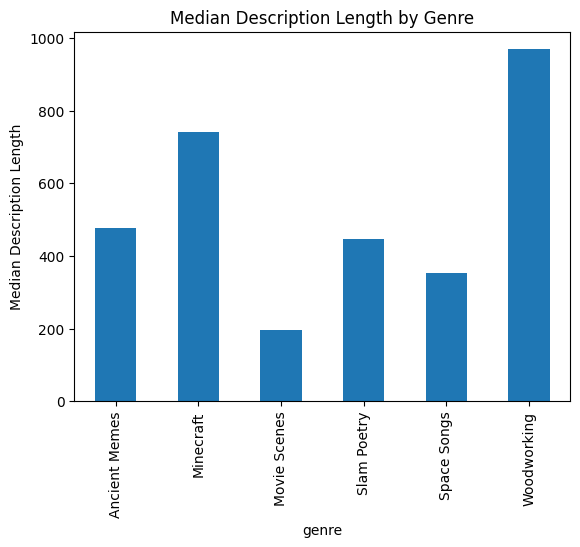

In [265]:
# create a column measuring description length (number of characters)
youtube['description_length'] = youtube['description'].str.len()

# graph the average description length by genre
import matplotlib.pyplot as plt

youtube.groupby('genre')['description_length'].median().plot(kind='bar')
plt.ylabel('Median Description Length')
plt.title('Median Description Length by Genre')
plt.show()


It makes sense that Movie Scenes would have the smallest description length, since a movie scene is pretty self-explanatory. Same for Space Songs and Slam Poetry. It's funny that Minecraft has the second-highest description length. That makes some sense, since people who make Minecraft videos probably do it as a passion project and would have a lot to say about what they've done. Woodworking has the highest median description length. Woodworking videos often have details about the tools they're using in their descriptions, as well as a summary of what the video will be going over. It isn't surprising, then, that Woodworking videos have the longest descriptions.

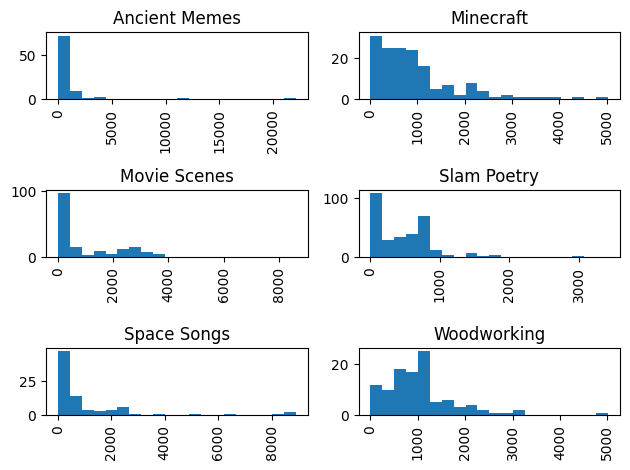

In [266]:
# graph a histogram of description length for every genre
youtube.hist(column='description_length', by='genre', bins=20)
# make sure there is enough space between the subplots
plt.tight_layout()
plt.show()

## What is the maximum description length for each genre?
...and what are the videos with those max-length descriptions?

In [267]:
# print the maximum description length for each genre
print(youtube.groupby('genre')['description_length'].max())
print()

# print the name of the video with the longest description in each genre
for genre in youtube['genre'].unique():
    max_length = youtube[youtube['genre'] == genre]['description_length'].max()
    # print the genre it's from
    print(genre)
    # print the description length
    print("description length: ", max_length)
    # print the title of the video
    print(youtube[(youtube['description_length'] == max_length) & (youtube['genre'] == genre)]['title'])
    print()



genre
Ancient Memes    22077
Minecraft         5034
Movie Scenes      8604
Slam Poetry       3424
Space Songs       8899
Woodworking       5018
Name: description_length, dtype: int64

Slam Poetry
description length:  3424
168    Twoey Gray - "Lolita's Revenge"
Name: title, dtype: object

Minecraft
description length:  5034
367    Minecraft: Bioshock - The City of Rapture Part 1
Name: title, dtype: object

Movie Scenes
description length:  8604
532    Whitney Houston & Brandy - IMPOSSIBLE / IT'S P...
Name: title, dtype: object

Woodworking
description length:  5018
677    34 - Learn How to Make RAISED PANEL DOORS With...
Name: title, dtype: object

Space Songs
description length:  8899
806    The Kinks - Supersonic Rocket Ship
Name: title, dtype: object

Ancient Memes
description length:  22077
859    "Weird Al" Yankovic - Trapped In The Drive-Thr...
Name: title, dtype: object



Something funny here: the longest description in our database is (by far), "Weird Al Yankovic - Trapped In The Drive-Thru" from Ancient Memes, with a description length of 22,077 characters.

The description of this video contains the lyrics/script for the whole video, as well as some promotion stuff (like links). This is somewhat surprising to me, because I would have expected many of the Space Songs videos to have lyrics in their descriptions too (and thus be closer to the length of the "Trapped In The Drive-Thru" video's description).

This made me wonder...

### Are song lyrics posted in music video descriptions more often or less often as songs get more recent?


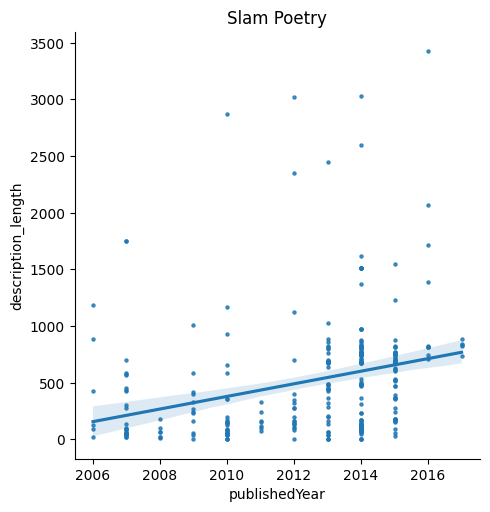

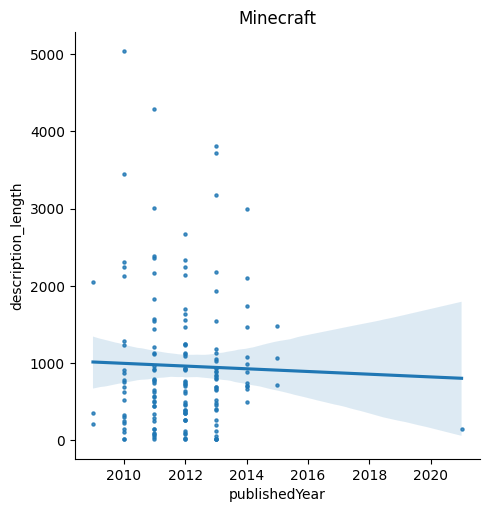

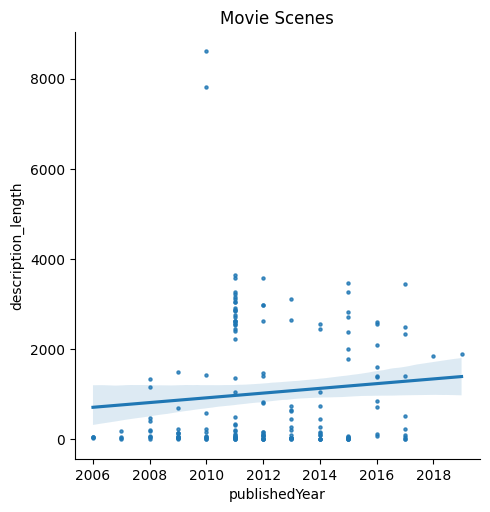

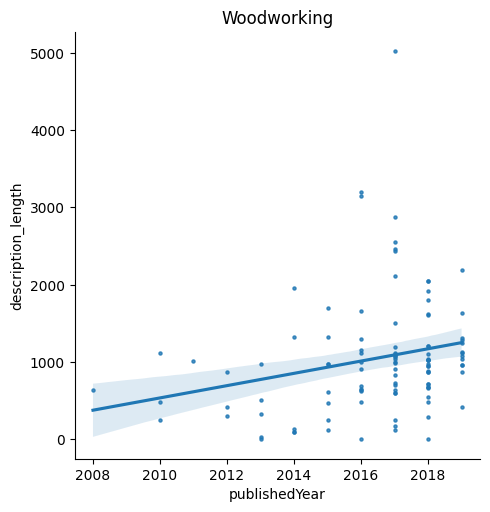

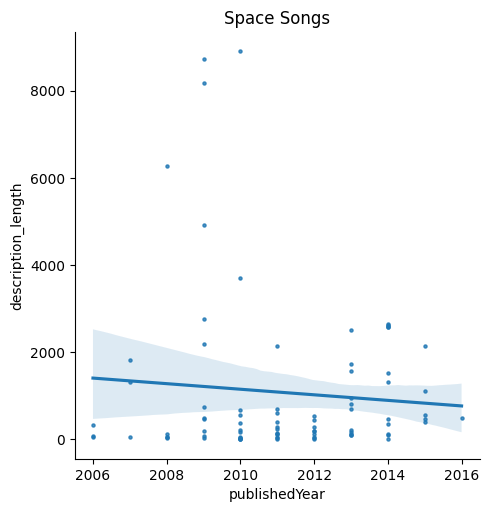

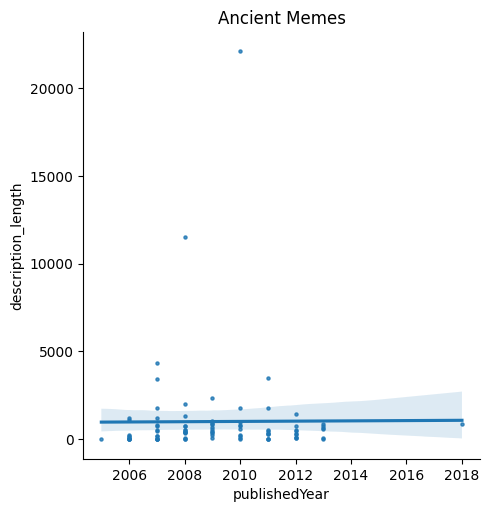

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove whitespace in 'publishedAt'
youtube['publishedAt'] = youtube['publishedAt'].str.strip()

# Convert 'publishedAt' to datetime format
youtube['publishedAt'] = pd.to_datetime(youtube['publishedAt'])

# Extract the year from 'publishedAt'
youtube['publishedYear'] = youtube['publishedAt'].dt.year

# for each genre, plot the relationship between description length and published year
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=youtube, x='publishedYear', y='description_length', hue='genre')
# plt.xlabel('Published Year')
# plt.ylabel('Description Length')
# plt.title('Scatterplot of Description Length vs. Published Year by Genre')
# plt.show()

for genre in youtube['genre'].unique():
    # plot the linear regression line
    # make the points smaller
    sns.lmplot(data=youtube[youtube['genre'] == genre], x='publishedYear', y='description_length', scatter_kws={'s': 5})
    plt.title(genre)
    plt.show()



In [269]:
# for each genre, print the correlation coefficient between description length and published year
for genre in youtube['genre'].unique():
    print(genre)
    print(youtube[youtube['genre'] == genre]['publishedYear'].corr(youtube[youtube['genre'] == genre]['description_length']))
    print()

Slam Poetry
0.2928493244611422

Minecraft
-0.029091969488672906

Movie Scenes
0.10354502795235627

Woodworking
0.23796269129180567

Space Songs
-0.08344725975458002

Ancient Memes
0.006973079671322188



From the above plots, it seems that Space Songs had a few long descriptions from 2008-2010, but none since. The correlation coefficient for description length and the year the video was published (publishedYear) isn't very strong, indicating that there hasn't been a big change in description length year-to-year in Space Songs. We can conclude that, at least for our small sample, it has always been uncommon to put song lyrics in the description of a music video. Thus, Weird Al's Drivethrough video had the longest description by far.

## How does description length correlate with view count?

In [270]:
# print the correlation coefficient for description length and views
print(youtube.groupby('genre')['description_length'].corr(youtube['viewCount']))

genre
Ancient Memes   -0.019658
Minecraft        0.235570
Movie Scenes     0.351774
Slam Poetry      0.229501
Space Songs     -0.018624
Woodworking     -0.087155
Name: description_length, dtype: float64


It seems that the strongest correlations (and the only correlations that seem somewhat credible) happen in Minecraft videos, Movie Scenes, and Slam Poetry -- where having a longer description correlates somewhat with having a higher view count.

Why is this?

## Use logistic regression to predict the genre of the video

### Using TF-IDF Vectorization

In [271]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(youtube['description'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, youtube['genre'], random_state=42)

nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

print(f'TF-IDF Accuracy: {accuracy_tfidf:.2f}')
print(f'TF-IDF Precision: {precision_tfidf:.2f}')
print(f'TF-IDF Recall: {recall_tfidf:.2f}')
print(f'TF-IDF F1-Score: {f1_tfidf:.2f}')

print(X_tfidf)

# TODO: GET THIS WORKING vvv
# for each genre, print the accuracy, precision, recall, and F1-score of the model
# for genre in youtube['genre'].unique():
#     print(genre)
#     X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, youtube[youtube['genre'] == genre]['genre'], random_state=42)
#     nb_classifier_tfidf = MultinomialNB()
#     nb_classifier_tfidf.fit(X_train_tfidf, y_train)
#     y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

#     accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
#     precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
#     recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
#     f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

#     print(f'Accuracy: {accuracy_tfidf:.2f}')
#     print(f'Precision: {precision_tfidf:.2f}')
#     print(f'Recall: {recall_tfidf:.2f}')
#     print(f'F1-Score: {f1_tfidf:.2f}')
#     print()

TF-IDF Accuracy: 0.71
TF-IDF Precision: 0.72
TF-IDF Recall: 0.71
TF-IDF F1-Score: 0.66
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47264 stored elements and shape (926, 12966)>
  Coords	Values
  (0, 7372)	0.06839487357856415
  (0, 11092)	0.08916370318467255
  (0, 2218)	0.48158721874707705
  (0, 8769)	0.30454179269163534
  (0, 5742)	0.16076242436189692
  (0, 1851)	0.10464609865241384
  (0, 7070)	0.10906562252762213
  (0, 2222)	0.15546611368466356
  (0, 11009)	0.05595240585888031
  (0, 7916)	0.05808452529112475
  (0, 12166)	0.10483755044312672
  (0, 3271)	0.10886059568579748
  (0, 2223)	0.14037102739692314
  (0, 7529)	0.1466360542611853
  (0, 4708)	0.14037102739692314
  (0, 3746)	0.07049048976009908
  (0, 7553)	0.08580667039485934
  (0, 6928)	0.17342840392681813
  (0, 4482)	0.17251141822044722
  (0, 241)	0.15546611368466356
  (0, 7626)	0.1466360542611853
  (0, 2275)	0.11834078118253646
  (0, 1651)	0.11470274312448236
  (0, 3787)	0.1466360542611853
  (0, 9868)	0.11644588

c:\Users\Moo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


When using TF-IDF to encode the words in a video's description, we are able to predict what genre a video is in with an F1-Score of 0.66. This isn't all that great -- accuracy, precision, and recall are all in the early 0.70's.

What if we encoded the words using a different method?

### Using a Count Vectorizer

In [272]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [273]:
y = youtube['genre']
X = youtube['description']

countvec = CountVectorizer(stop_words='english')

# split the data into training and testing sets with a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a pipeline with a count vectorizer and a logistic regression model
pipe = make_pipeline(countvec, LogisticRegression())

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# predict the genre of the testing data
y_pred = pipe.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

# perform cross-validation on the training set and store the results in a DataFrame
cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)
print()

# calculate the mean cross-validation score to evaluate model performance
mean_cv_score = cv_results_df['test_score'].mean()
print(f'Mean Cross-Validation Score: {mean_cv_score:.2f}')

               precision    recall  f1-score   support

Ancient Memes       0.75      0.30      0.43        20
    Minecraft       0.76      0.89      0.82        46
 Movie Scenes       0.58      0.88      0.70        42
  Slam Poetry       0.97      0.89      0.93        83
  Space Songs       1.00      0.65      0.79        17
  Woodworking       0.95      0.75      0.84        24

     accuracy                           0.81       232
    macro avg       0.83      0.73      0.75       232
 weighted avg       0.84      0.81      0.80       232

   fit_time  score_time  test_score  train_score
0  0.670971    0.172817    0.791367     0.972973
1  0.819332    0.021040    0.791367     0.974775
2  0.590032    0.020090    0.769784     0.971171
3  0.404837    0.021036    0.784173     0.974775
4  0.486806    0.022621    0.789855     0.976619

Mean Cross-Validation Score: 0.79


The overall F1-Score we got using a count vectorizer was better than the one we got using TF-IDF (by about 10%). A possible reason for this may be that there are a lot of unique words in the descriptions (which are weighted higher in TF-IDF) that are specific to just one video and don't say a lot about that video's genre? But there might be something else in the way that the models are implemented that accounts for this difference.

Another interesting thing to note: Ancient Memes has _by far_ the lowest F1-Score for the count vectorizer's prediction. This may be because Ancient Memes is a much more eclectic genre than any of the others. Memes can vary wildly from one to another, and so it makes sense that their descriptions might vary wildly, too. There isn't a lot of continuity, video to video.

Slam Poetry has the highest F1-Score, beating the second-highest by about 10%. As we'll see later, the words with the highest absolute coefficients for predicting on, in the genre of Slam Poetry, include poetry, slam, poem, spoken, performs, and performed.

It seems that most Slam Poetry videos mention that the video is a slam poem (or a spoken-word poem) performed by so-and-so. There doesn't seem to be a lot of variance in their descriptions.

### For each genre, what video has the highest probability of being in that genre? (according to our prediction)

In [274]:
# predict probabilities on the test set
y_pred_prob = pipe.predict_proba(X_test)

# print the video with the highest probability for each genre
for genre in youtube['genre'].unique():
    genre_idx = pipe.classes_.tolist().index(genre)
    max_prob_idx = y_pred_prob[:, genre_idx].argmax()
    test_idx = X_test.index[max_prob_idx]
    print(genre)
    print(youtube.iloc[test_idx]['title'])
    # print the description of the video
    print(youtube.iloc[test_idx]['description'])
    print()


Slam Poetry
Edinburgh Festival 2014 performance Loud Poets Miko Berry, Scottish Poetry Slam Champion,150 seconds
Edinburgh Festival Recommended Best Shows 2014\,  Edinburgh Festival 2014 performance by Loud Poets founder Miko Berry\, Scottish Poetry Slam Champion\, 150 seconds\,   Miko puts the FUN into Poetry!   http://www.LoudPoets.com https://www.facebook.com/LoudPoets http://youtube.com/LoudPoets http://twitter.com/LoudPoets https://www.facebook.com/mikopoet   #LoudPoets  #StoryTellingCentre  #Iamloud  #TheRevolutionWillBeSpoken  #EdFringe    This is slam-style\, make some noise\, fist-thumping\, pint-drinking\, side-tickling\, heart-wrenching poetry. This is poetry for the masses. This is the spoken word revolution. Featuring the best spoken word artists from Scotland and beyond. Performing with a live band\, meaning an exciting\, different show every night.  Please check the links for exact dates and to purchase tickets  https://www.edfringe.com/whats-on/spoken-word/loud-poets  h

### Which words are the best predictors of each genre?

In [275]:
vec_from_pipe = pipe.named_steps['countvectorizer']
logreg_from_pipe = pipe.named_steps['logisticregression']

# get the feature names from the count vectorizer
feature_names = vec_from_pipe.get_feature_names_out()

# Iterate over each genre
for idx, genre in enumerate(pipe.classes_):
    print(f'Genre: {genre}')
    
    # Get the coefficients for the current genre
    coefficients = logreg_from_pipe.coef_[idx]
    
    # Combine the words with their corresponding coefficients
    word_coefficient = list(zip(feature_names, coefficients))
    
    # Sort the words by their absolute coefficients
    word_coefficient.sort(key=lambda x: abs(x[1]), reverse=True)
    
    # Print the 5 words with the highest absolute coefficients for the current genre
    print('Top 5 words with the highest absolute coefficients:')
    highest_words = word_coefficient[:10]
    for word, coef in highest_words:
        print(f'{word}: {coef:.2f}')
    print()


Genre: Ancient Memes
Top 5 words with the highest absolute coefficients:
funny: 0.87
dancing: 0.78
spartaaaa: 0.74
haha: 0.73
lady: 0.61
yeast: 0.61
enjoyed: 0.59
baby: 0.56
wars: 0.54
00: 0.52

Genre: Minecraft
Top 5 words with the highest absolute coefficients:
vareide: 1.25
dennis: 1.25
minecraft: 1.25
fap: 0.73
victim: 0.72
videos: 0.67
pyramide: 0.63
server: 0.63
just: 0.62
qkzv3m_zwgk: 0.57

Genre: Movie Scenes
Top 5 words with the highest absolute coefficients:
movie: 1.37
scene: 1.35
video: -0.84
scenes: 0.67
poetry: -0.63
film: 0.59
disney: 0.53
tootski: 0.52
speech: 0.50
funny: -0.48

Genre: Slam Poetry
Top 5 words with the highest absolute coefficients:
poetry: 1.78
slam: 1.30
poem: 0.97
def: 0.89
27: 0.70
spoken: 0.69
homemade: 0.67
performs: 0.57
performed: 0.56
2014: 0.56

Genre: Space Songs
Top 5 words with the highest absolute coefficients:
album: 1.13
space: 0.86
moon: 0.86
music: 0.59
2010: 0.58
futuristic: 0.57
sounds: 0.56
song: 0.51
john: 0.49
gravity: 0.49

Genre:

## Predict the genre based on description length

### Decision Tree

In [276]:
# import scikit-learn
from sklearn.model_selection import train_test_split

# train test split
X = youtube['description_length']
y = youtube['genre']

# split the data into training and testing sets with a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a pipeline
pipe = make_pipeline(DecisionTreeClassifier())

# fit the pipeline to the training data
pipe.fit(X_train.values.reshape(-1, 1), y_train)

# predict the genre of the testing data
y_pred = pipe.predict(X_test.values.reshape(-1, 1))

# print the classification report
print(classification_report(y_test, y_pred))

# perform cross-validation on the training set and store the results in a DataFrame
cv_results = cross_validate(pipe, X_train.values.reshape(-1, 1), y_train, return_train_score=True)
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)
print()

# calculate the mean cross-validation score to evaluate model performance
mean_cv_score = cv_results_df['test_score'].mean()
print(f'Mean Cross-Validation Score: {mean_cv_score:.2f}')

               precision    recall  f1-score   support

Ancient Memes       0.04      0.05      0.04        20
    Minecraft       0.31      0.33      0.32        46
 Movie Scenes       0.25      0.33      0.29        42
  Slam Poetry       0.52      0.37      0.43        83
  Space Songs       0.12      0.12      0.12        17
  Woodworking       0.28      0.29      0.29        24

     accuracy                           0.30       232
    macro avg       0.25      0.25      0.25       232
 weighted avg       0.33      0.30      0.31       232

   fit_time  score_time  test_score  train_score
0  0.003529    0.001190    0.309353     0.870270
1  0.003421    0.001135    0.273381     0.864865
2  0.003083    0.001106    0.302158     0.859459
3  0.003242    0.001298    0.330935     0.859459
4  0.003038    0.001395    0.326087     0.859712

Mean Cross-Validation Score: 0.31


Observation/conclusion: description length is not an effective way of predicting genre. The words in the description, however, _are_ pretty good at predicting genre.

# Trends in Comment Sections

## What videos do people tend to leave more comments on?

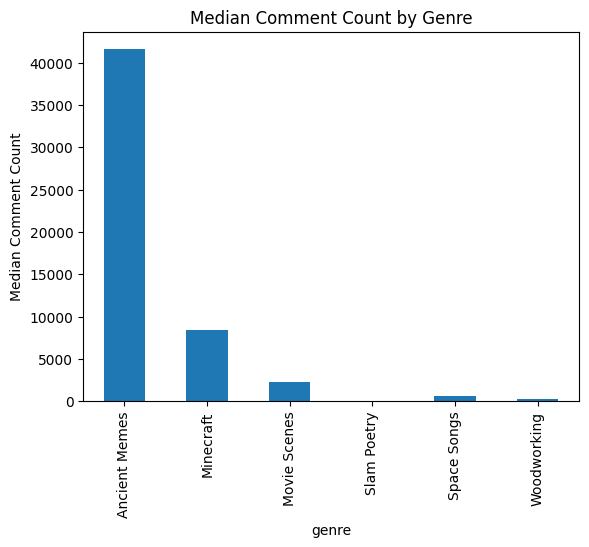

MEDIAN COMMENT COUNT BY GENRE ---------------------------
genre
Ancient Memes    41571.5
Minecraft         8404.5
Movie Scenes      2231.5
Space Songs        660.0
Woodworking        241.0
Slam Poetry         78.0
Name: commentCount, dtype: float64

VIDEO WITH HIGHEST COMMENT COUNT BY GENRE ---------------
Slam Poetry
commentCount:  13144.0
viewCount:  142    6558239
Name: viewCount, dtype: int64
142    I Will Not Let An Exam Result Decide My Fate||...
Name: title, dtype: object

Minecraft
commentCount:  464278.0
viewCount:  326    161350865
Name: viewCount, dtype: int64
326    "Fallen Kingdom" - A Minecraft Parody of Coldp...
Name: title, dtype: object

Movie Scenes
commentCount:  527602.0
viewCount:  594    1013621001
Name: viewCount, dtype: int64
594    Michael Jackson - Smooth Criminal (Official Vi...
Name: title, dtype: object

Woodworking
commentCount:  4843.0
viewCount:  734    3511706
Name: viewCount, dtype: int64
734    8ft Floating Shelf With Hidden Storage | DIY B...
Name: t

In [277]:
# CommentCount is supposed to be a float. Drop rows where it is not.
youtube = youtube.dropna(subset=['commentCount'])

# drop '' in commentCount
youtube = youtube[youtube['commentCount'] != '']

# convert commentCount to a float
youtube['commentCount'] = youtube['commentCount'].astype(float)

# graph the median commentCount by genre
youtube.groupby('genre')['commentCount'].median().plot(kind='bar')
plt.ylabel('Median Comment Count')
plt.title('Median Comment Count by Genre')
plt.show()

# for each genre, print the median commentCount in order of highest to lowest
print("MEDIAN COMMENT COUNT BY GENRE ---------------------------")
print(youtube.groupby('genre')['commentCount'].median().sort_values(ascending=False))
print()

# for each genre, print the video with the highest commentCount
print("VIDEO WITH HIGHEST COMMENT COUNT BY GENRE ---------------")
for genre in youtube['genre'].unique():
    max_commentCount = youtube[youtube['genre'] == genre]['commentCount'].max()
    print(genre)
    print("commentCount: ", max_commentCount)
    # print viewCount
    print("viewCount: ", youtube[(youtube['commentCount'] == max_commentCount) & (youtube['genre'] == genre)]['viewCount'])
    print(youtube[(youtube['commentCount'] == max_commentCount) & (youtube['genre'] == genre)]['title'])
    print()


Ancient Memes has a _much_ higher median comment count than any other genre. This may be because Ancient Memes are typically older videos and have had a lot more time to accrue comments. Ancient Memes are also, almost by definition of their genre, a lot less niche and obscure than the other genres. The Ancient Memes playlist used for analyzing this genre has a lot of old, viral videos on it, menaing that the pool of poeple who see the video and might comment on it is just a lot bigger than any other genre. 

It may also be the case, though, that people are more inclined to comment on a meme than they are to comment on  movie scene or music video.

## What is the median view count for each genre?

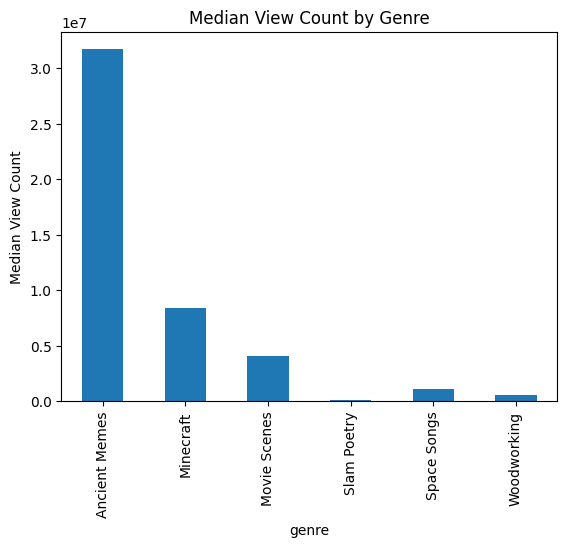

MEDIAN VIEW COUNT BY GENRE ------------------------------
genre
Ancient Memes    31701104.0
Minecraft         8400374.5
Movie Scenes      4088239.5
Space Songs       1139732.0
Woodworking        544452.0
Slam Poetry        142835.5
Name: viewCount, dtype: float64

VIDEO WITH HIGHEST VIEW COUNT BY GENRE ------------------
Slam Poetry
viewCount:  16495964
commentCount:  141    11018.0
Name: commentCount, dtype: float64

Minecraft
viewCount:  336970447
commentCount:  345    172135.0
Name: commentCount, dtype: float64

Movie Scenes
viewCount:  1013621001
commentCount:  594    527602.0
Name: commentCount, dtype: float64

Woodworking
viewCount:  34564763
commentCount:  749    3819.0
Name: commentCount, dtype: float64

Space Songs
viewCount:  4092199768
commentCount:  754    514504.0
Name: commentCount, dtype: float64

Ancient Memes
viewCount:  5363493917
commentCount:  852    5402677.0
Name: commentCount, dtype: float64



In [278]:
# graph the median viewCount by genre
youtube.groupby('genre')['viewCount'].median().plot(kind='bar')
plt.ylabel('Median View Count')
plt.title('Median View Count by Genre')
plt.show()

# for each genre, print the median viewCount in order of highest to lowest
print("MEDIAN VIEW COUNT BY GENRE ------------------------------")
print(youtube.groupby('genre')['viewCount'].median().sort_values(ascending=False))
print()

# for each genre, print the video with the highest commentCount
print("VIDEO WITH HIGHEST VIEW COUNT BY GENRE ------------------")
for genre in youtube['genre'].unique():
    max_commentCount = youtube[youtube['genre'] == genre]['viewCount'].max()
    print(genre)
    print("viewCount: ", max_commentCount)
    # print commentCount
    print("commentCount: ", youtube[(youtube['viewCount'] == max_commentCount) & (youtube['genre'] == genre)]['commentCount'])
    print()



The viewCount here seems to match the comment count we plotted earlier. I wonder...

### Is there a relationship between comment count and view count?

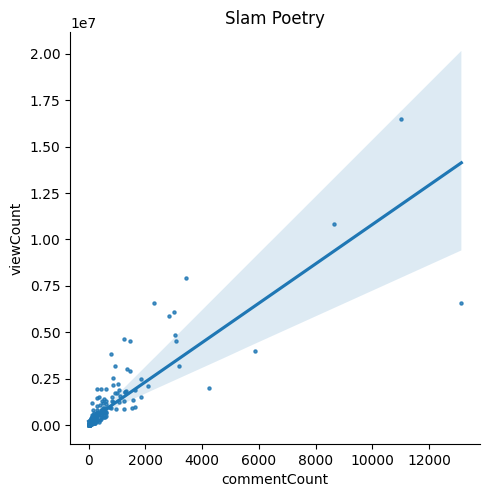

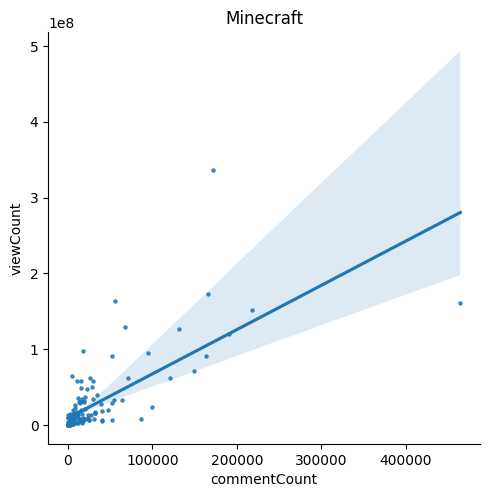

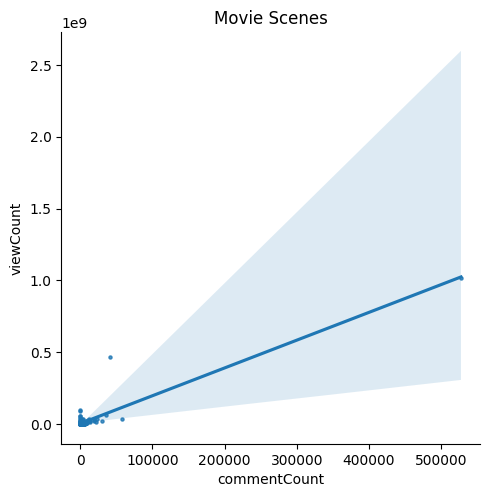

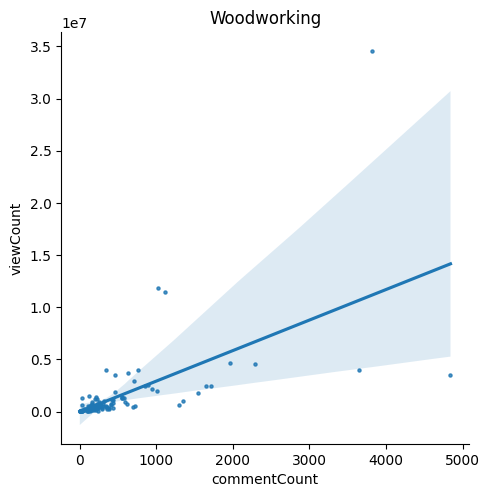

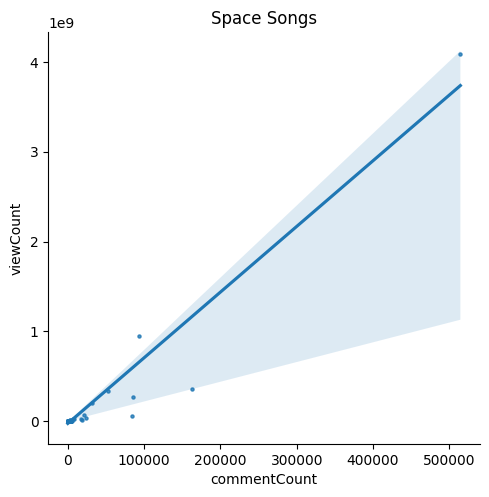

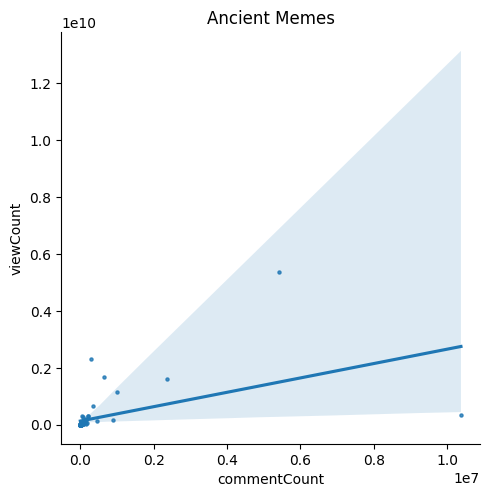

In [279]:
import seaborn as sns

# for each genre, graph the relationship between commentCount and viewCount
for genre in youtube['genre'].unique():
    # plot the linear regression line
    # make the points smaller
    sns.lmplot(data=youtube[youtube['genre'] == genre], x='commentCount', y='viewCount', scatter_kws={'s': 5})
    plt.title(genre)
    plt.show()


In [280]:
# for each genre, print the correlation coefficient between commentCount and viewCount in order of highest to lowest
print("CORRELATION COEFFICIENT BETWEEN COMMENT COUNT AND VIEW COUNT BY GENRE ---------------------------")
print(youtube.groupby('genre')['commentCount'].corr(youtube['viewCount']).sort_values(ascending=False))


CORRELATION COEFFICIENT BETWEEN COMMENT COUNT AND VIEW COUNT BY GENRE ---------------------------
genre
Space Songs      0.961765
Movie Scenes     0.919592
Slam Poetry      0.854547
Minecraft        0.719207
Woodworking      0.595980
Ancient Memes    0.477798
Name: commentCount, dtype: float64


Yes, it would seem that comment count and view count have fairly strong correlations for a lot of our genres. The two genres with the least correlation between the two are Woodworking and Ancient Memes. These genres have more videos with a high amount of comments and a comparatively low amount of views.

Might this indicate that people are more likely to comment on an Ancient Memes video or a Woodworking video than on videos from the other genres?

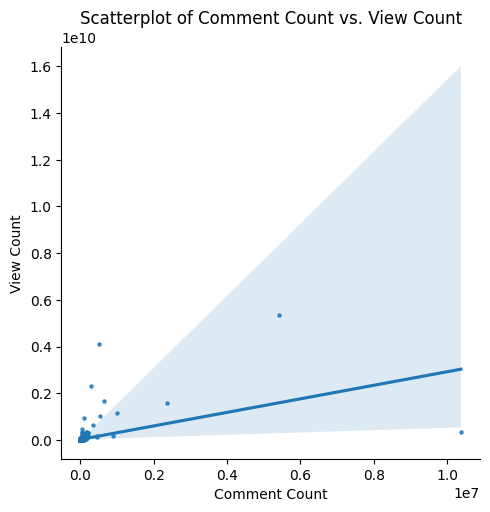

CORRELATION COEFFICIENT BETWEEN COMMENT COUNT AND VIEW COUNT ---------------------------
0.448814037113445



In [288]:
# plot the relationship between commentCount and viewCount
# plt.scatter(youtube['commentCount'], youtube['viewCount'])
# plt.xlabel('Comment Count')
# plt.ylabel('View Count')
# plt.title('Scatterplot of Comment Count vs. View Count')
# plt.show()

sns.lmplot(data=youtube, x='commentCount', y='viewCount', scatter_kws={'s': 5})
plt.xlabel('Comment Count')
plt.ylabel('View Count')
plt.title('Scatterplot of Comment Count vs. View Count')
plt.show()

# print the correlation coefficient between commentCount and viewCount
print("CORRELATION COEFFICIENT BETWEEN COMMENT COUNT AND VIEW COUNT ---------------------------")
print(youtube['commentCount'].corr(youtube['viewCount']))
print()


## What is the relationship between description length and view count?

First, plot the relationship when considering all genres together:

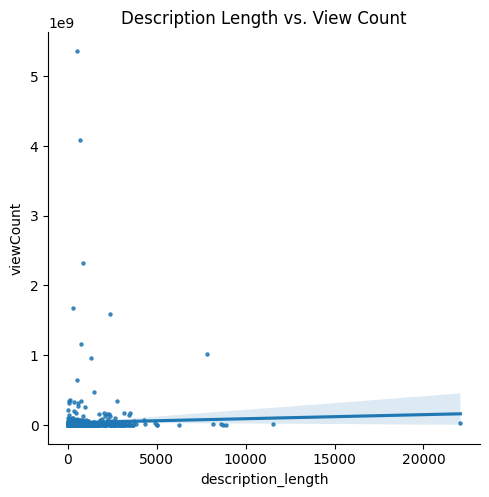

CORRELATION COEFFICIENT BETWEEN DESCRIPTION LENGTH AND VIEW COUNT ---------------------------
0.029618679083779707


In [282]:
# plot the relationship between description length and viewCount
sns.lmplot(data=youtube, x='description_length', y='viewCount', scatter_kws={'s': 5})
plt.title('Description Length vs. View Count')
plt.show()

# print the correlation coefficient between description length and viewCount
print("CORRELATION COEFFICIENT BETWEEN DESCRIPTION LENGTH AND VIEW COUNT ---------------------------")
print(youtube['description_length'].corr(youtube['viewCount']))


There is a slight, positive correlation. It isn't strong though.

Now, look at the relationship for each genre individually:

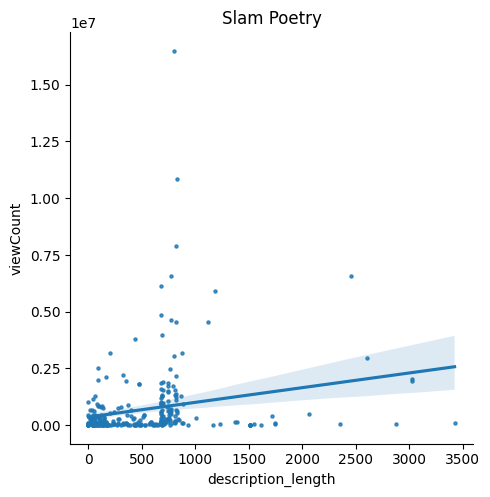

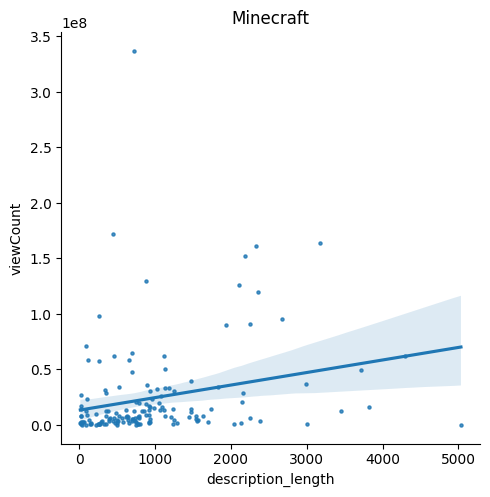

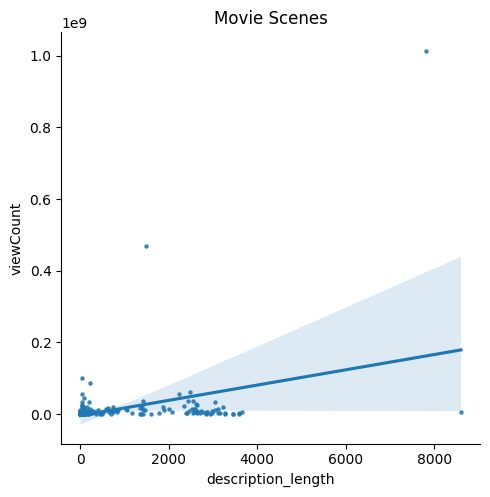

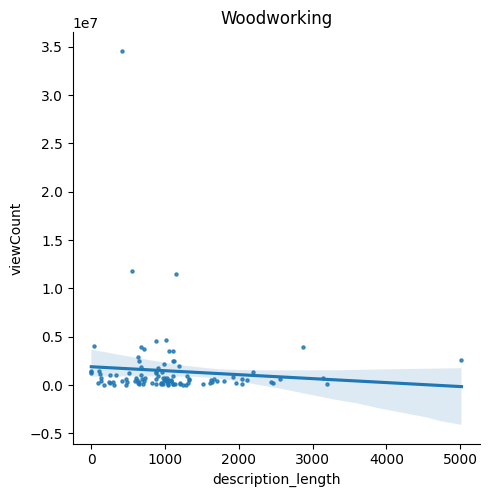

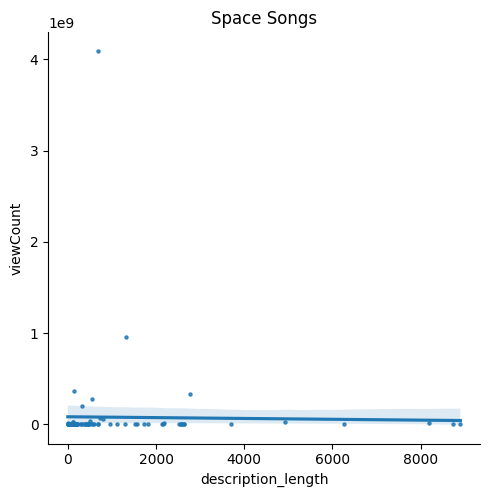

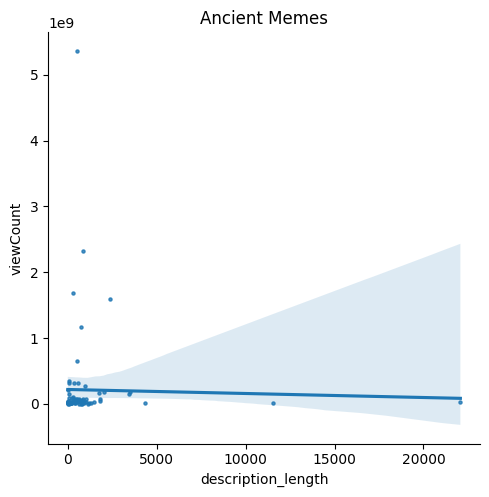

CORRELATION COEFFICIENT BETWEEN DESCRIPTION LENGTH AND VIEW COUNT BY GENRE ---------------------------
genre
Movie Scenes     0.350554
Minecraft        0.236534
Slam Poetry      0.217899
Space Songs     -0.018624
Ancient Memes   -0.024420
Woodworking     -0.084239
Name: description_length, dtype: float64


In [283]:
# for each genre, plot the relationship between description length and viewCount
for genre in youtube['genre'].unique():
    sns.lmplot(data=youtube[youtube['genre'] == genre], x='description_length', y='viewCount', scatter_kws={'s': 5})
    plt.title(genre)
    plt.show()

# for each genre, print the correlation coefficient between description length and viewCount in order of highest to lowest
print("CORRELATION COEFFICIENT BETWEEN DESCRIPTION LENGTH AND VIEW COUNT BY GENRE ---------------------------")
print(youtube.groupby('genre')['description_length'].corr(youtube['viewCount']).sort_values(ascending=False))

## What is the median video duration for each genre?

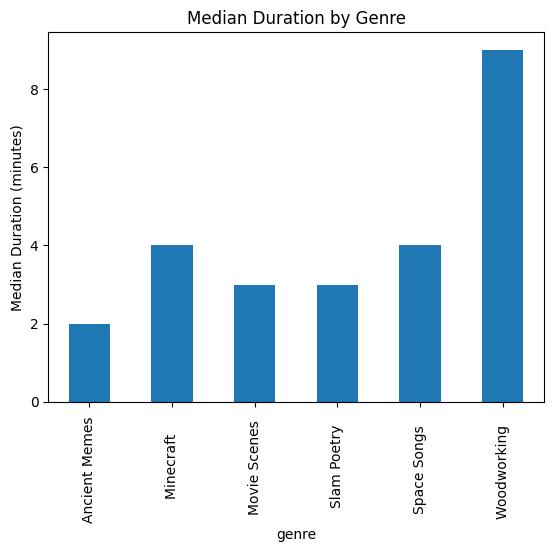

MEDIAN DURATION BY GENRE (IN MINUTES) --------------
genre
Woodworking       9.0
Minecraft         4.0
Space Songs       4.0
Slam Poetry       3.0
Movie Scenes      3.0
Ancient Memes     2.0
Name: duration, dtype: float64



In [284]:
import pandas as pd
import isodate

youtube = pd.read_csv('youtube-data.csv')

# remove the white space in column names of youtube
youtube.columns = youtube.columns.str.strip()

# remove nas in 'duration' column
youtube = youtube.dropna(subset=['duration'])

# Convert all rows in the 'duration' column to datestrings
youtube['duration'] = youtube['duration'].astype(str)

# Remove white space in 'duration' column
youtube['duration'] = youtube['duration'].str.strip()

# Function to convert ISO 8601 duration to minutes
def convert_duration_to_seconds(duration):
    try:
        return int(isodate.parse_duration(duration).total_seconds())
    except isodate.ISO8601Error:
        print(f"Failed to parse duration: {duration}")
        return None

# Convert ISO 8601 duration to seconds in column 'duration'
youtube['duration'] = youtube['duration'].apply(convert_duration_to_seconds)

# Convert ISO 8601 duration to minutes in column 'duration'
youtube['duration'] = youtube['duration'] / 60

# Drop rows where conversion failed
youtube = youtube.dropna(subset=['duration'])

# Convert 'duration' column to int
youtube['duration'] = youtube['duration'].astype(int)

# graph the median duration by genre
youtube.groupby('genre')['duration'].median().plot(kind='bar')
plt.ylabel('Median Duration (minutes)')
plt.title('Median Duration by Genre')
plt.show()

# for each genre, print the median duration in order of highest to lowest
print("MEDIAN DURATION BY GENRE (IN MINUTES) --------------")
print(youtube.groupby('genre')['duration'].median().sort_values(ascending=False))
print()

It was surprising at first how much longer Woodworking videos are than every other genre, but upon reflection this makes sense. Memes, movie scenes, slam poems, and songs are all shorter almost by definition. Most songs are around three or four minutes long, slam poetry is short-form, movie scenes are never long enough to give away much of the movie, and memes are also short-form basically by definition. The figure that surprised me was Minecraft videos -- I would have expected them to be longer than they are, since nothing about Minecraft videos demands shorter content.

Woodworking videos being closer to 9 minutes each makes sense, since the videos we used for our Woodworking genre sample are mostly how-to videos. These tend to be longer, since there is a lot of technical information being communicated. 

Perhaps Minecraft videos fall in line with shorter-form content because that is the length of video that people seeking entertainment on YouTube are used to seeing.

It would be interesting to look into why songs, movie scenes, memes, poems, etc. tend to be around 3 minutes, from a psychological point of view.

## What is the relationship between duration and comment count?

First, look at this for all genres together:

object


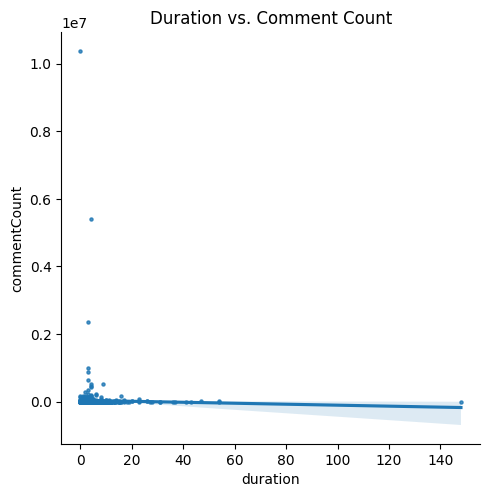

CORRELATION COEFFICIENT BETWEEN DURATION AND COMMENT COUNT ---------------------------
-0.02540727694196687


In [285]:
# print the type of commentCount
print(youtube['commentCount'].dtype)

# remove white space in commentCount
youtube['commentCount'] = youtube['commentCount'].str.strip()

# drop '' in commentCount
youtube = youtube[youtube['commentCount'] != '']

# convert commentCount to a float
youtube['commentCount'] = youtube['commentCount'].astype(float)

# graph the relationship between duration and commentCount
sns.lmplot(data=youtube, x='duration', y='commentCount', scatter_kws={'s': 5})
plt.title('Duration vs. Comment Count')
plt.show()

# print the correlation coefficient between duration and commentCount
print("CORRELATION COEFFICIENT BETWEEN DURATION AND COMMENT COUNT ---------------------------")
print(youtube['duration'].corr(youtube['commentCount']))


From this, it looks like there's hardly any correlation between duration and comment count.

Now look at this for each genre separately:

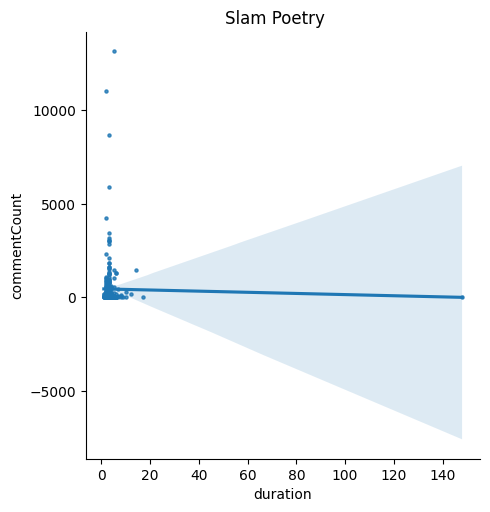

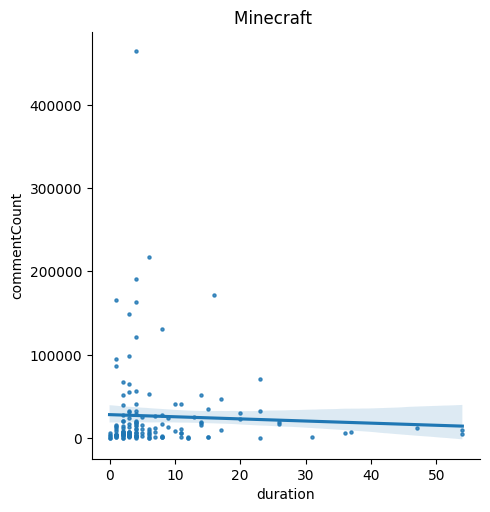

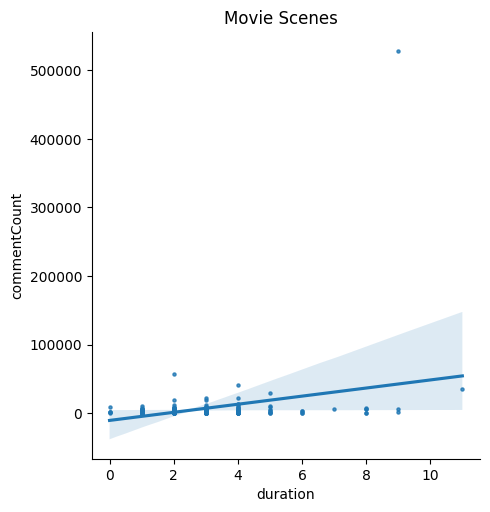

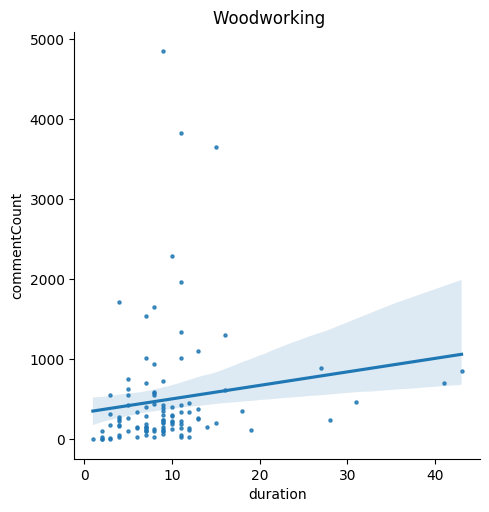

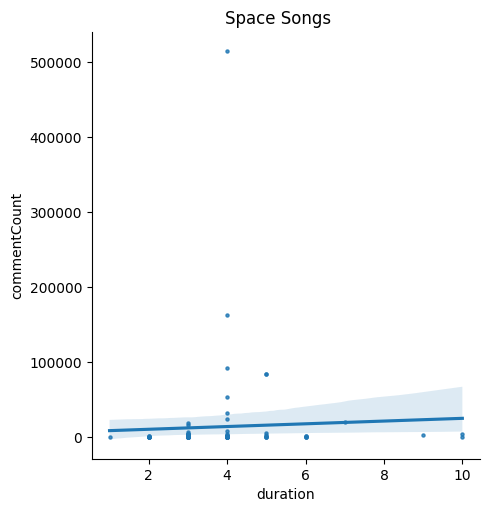

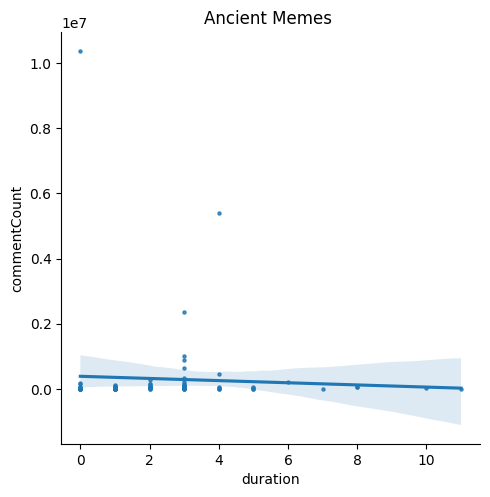

CORRELATION COEFFICIENT BETWEEN DURATION AND COMMENT COUNT BY GENRE ---------------------------
genre
Movie Scenes      0.269606
Woodworking       0.148625
Space Songs       0.047575
Slam Poetry      -0.020523
Minecraft        -0.045009
Ancient Memes    -0.056305
Name: duration, dtype: float64


In [286]:
# for each genre, plot the relationship between duration and commentCount
for genre in youtube['genre'].unique():
    # plot the linear regression line
    # make the points smaller
    sns.lmplot(data=youtube[youtube['genre'] == genre], x='duration', y='commentCount', scatter_kws={'s': 5})
    plt.title(genre)
    plt.show()

# for each genre, print the correlation coefficient between duration and commentCount in order of highest to lowest
print("CORRELATION COEFFICIENT BETWEEN DURATION AND COMMENT COUNT BY GENRE ---------------------------")
print(youtube.groupby('genre')['duration'].corr(youtube['commentCount']).sort_values(ascending=False))


The strongest correlations between duration and comment count are in Movie Scenes and Woodworking. The Movie Scenes correlation may be swayed by one outlier though, and the Woodworking videos with the longest duration don't have the highest comment count at all.